In [ ]:
!pip install --upgrade jax
!pip install scipy
import jax.numpy as jnp
from jax import jit, grad, vmap
from scipy.special import rel_entr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jax: filename=jax-0.4.6-py3-none-any.whl size=1432727 sha256=cb4281e23196b19c401561a8695172ce9bf3ec1f55d2883d481a8c30d121fff6
  Stored in directory: /root/.cache/pip/wheels/68/2c/93/17deec4d117dc0675ed79e8e2af1e62fb1c41ed3955c540de0
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.4.4
    Uninstalling jax-0.4.4:
      Successfully uninstalled jax-0.4.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(i) Cross-Entropy

Cross-entropy is a measure of variations between two probability distributions. It is often used as a loss function in machine learning to compare the predicted probability distribution to the actual probability distribution. The cross-entropy between two probability distributions A and B is given by: 

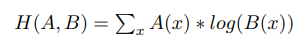

here x is a set of random variable in X discrete states.

In [ ]:
def cross_entropy(a, b):
  return -jnp.sum(a * jnp.log(b))

(ii) Entropy

Entropy is a measure of the amount of uncertainty or randomness in a probability distribution. The entropy for probability distribution C is given by:

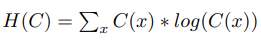

here x is a set of random variable in X discrete states.


In [ ]:
def entropy(c):
  return -jnp.sum(c * jnp.log(c))

(iii) Mututal Information

Mutual information is a measure of the amount of information that two random variables share. The mutual information between two random variables A and B is given by:

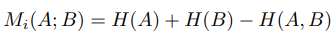

here H(A) and H(B) are the entropies of the two variables, and H(A,B) is the joint cross-entropy of the two variables.

In [ ]:
def mutual_information(a,b):
  h_a = entropy(a)
  h_b = entropy(b)
  h_ab = cross_entropy(a,b)
  return h_a + h_b - h_ab

iv) Conditional entropy:

Conditional entropy is a measure of the amount randomness in a probability distribution w.r.t another given variable. The conditional entropy of a probability distribution C given a random variable X is given by:

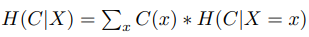


In [ ]:
def conditional_entropy(c,X):
    """
    Parameters:
    c (ndarray): Probability distribution of c.
    X (ndarray): Array of values of x.
    
    Returns:
    float: The value of H(c|X).
    """
    arr_X = jnp.unique(X)
    H_c_wrt_X= jnp.zeros(len(arr_X))
    for i, x in enumerate(arr_X):
        indices = jnp.where(X == x)
        prob_c_wrt_X = c[indices] / jnp.sum(c[indices])
        H_c_wrt_X[i] = entropy(prob_c_wrt_X)
    return -jnp.sum(c * H_c_wrt_X)


(v) KL Divergence

Kullback-Leibler(KL) divergence, is a measure of the deviation between two probability distributions A and B. It is defined as:

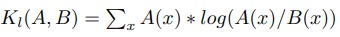

where x is a value in the support of both A and B. Intuitively, KL divergence measures the amount of information loss when using B to approximate A.

In [ ]:
def KL_divergence(a, b):
    """
    Computes KL divergence between two discrete probability distributions a and b.
    """
    a = jnp.asarray(a, dtype=jnp.float32)
    b = jnp.asarray(b, dtype=jnp.float32)
    return jnp.sum(a * jnp.log(a / b))
